# Chapter 4 Examples - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", 
#                    "AICcmodavg", "ellipse", "asbio", "QuantPsyc", 
#                    "qpcR","qqplotr"))
install.packages("qqplotr")

Installing package into ‘/home/jeremyfbuss/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



## Load Libraries

In [2]:
suppressMessages(library(readxl))
suppressMessages(library(qpcR))
suppressMessages(library(ggplot2))
suppressMessages(library(qqplotr))
#suppressMessages(library(ggpubr))
#suppressMessages(library(tidyverse))
#suppressMessages(library(broom))
#suppressMessages(library(AICcmodavg))
#suppressMessages(library(ellipse))
#suppressMessages(library(asbio))
#suppressMessages(library(QuantPsyc))

## 4.1 - The Delivery Time Data

In [3]:
Delivery.table <- read_excel(
    '../linear_regression_5e_data_sets/Chapter 3/Examples/data-ex-3-1 (Delivery Time).xls')

Delivery.df <- data.frame(Delivery.table$`Delivery Time, y`, 
                              Delivery.table$`Number of Cases, x1`, 
                              Delivery.table$`Distance, x2 (ft)`)

colnames(Delivery.df) <- c("DeliveryTime", "NumberCases", "Distance")

head(Delivery.df)

,DeliveryTime,NumberCases,Distance
,<dbl>,<dbl>,<dbl>
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330


In [4]:
summary(Delivery.df)

  DeliveryTime    NumberCases       Distance     
 Min.   : 8.00   Min.   : 2.00   Min.   :  36.0  
 1st Qu.:13.75   1st Qu.: 4.00   1st Qu.: 150.0  
 Median :18.11   Median : 7.00   Median : 330.0  
 Mean   :22.38   Mean   : 8.76   Mean   : 409.3  
 3rd Qu.:21.50   3rd Qu.:10.00   3rd Qu.: 605.0  
 Max.   :79.24   Max.   :30.00   Max.   :1460.0  

In [5]:
Delivery.lm <- lm(
    DeliveryTime ~ NumberCases + Distance, 
    data=Delivery.df)  

print(Delivery.lm)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = Delivery.df)

Coefficients:
(Intercept)  NumberCases     Distance  
    2.34123      1.61591      0.01438  



In [6]:
summary(Delivery.lm)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = Delivery.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
NumberCases 1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


In [1]:
anova(Delivery.lm)

ERROR: Error in anova(Delivery.lm): object 'Delivery.lm' not found


In [8]:
Delivery.lm.Mres <- anova(Delivery.lm)[[3]][3]

### Various Residual Derivations (as defined by Montgomer/Peck/Vining)

In [9]:
# Residuals
Delivery.Residuals <- resid(Delivery.lm)
Delivery.Residuals_2 <- Delivery.lm$residuals

# Check equivalency
all.equal(Delivery.Residuals, Delivery.Residuals_2)

[1] TRUE

In [10]:
# Standardized Residuals
Delivery.StandardizedResiduals <- resid(Delivery.lm) / sqrt(anova(Delivery.lm)[[3]][3])


In [11]:
Delivery.X <- as.matrix(cbind(1,Delivery.df[2:3]))

In [12]:
# Hat Matrix Diagonal
Delivery.HatMatrixDiagonals <- diag(Delivery.X %*% solve(t(Delivery.X) %*% Delivery.X) %*% t(Delivery.X))
Delivery.HatMatrixDiagonals_2 <- unname(influence(Delivery.lm)$hat)

all.equal(Delivery.HatMatrixDiagonals, Delivery.HatMatrixDiagonals_2)

[1] TRUE

In [13]:
# Studentized Residuals
Delivery.StudentizedResiduals <- Delivery.Residuals / sqrt(Delivery.lm.Mres * (1 - Delivery.HatMatrixDiagonals))
Delivery.StudentizedResiduals_2 <- rstandard(Delivery.lm)

# Check equivaliency
all.equal(Delivery.StudentizedResiduals, Delivery.StudentizedResiduals_2)

[1] TRUE

In [14]:
# PRESS Residual
Delivery.PRESSResiduals <- unname(Delivery.Residuals / (1 - Delivery.HatMatrixDiagonals))
Delivery.PRESSResiduals_2 <- PRESS(Delivery.lm, verbose = FALSE)$residuals

all.equal(Delivery.PRESSResiduals, Delivery.PRESSResiduals_2)

[1] TRUE

In [15]:
# R-student Residual
Delivery.n = nrow(Delivery.df)
Delivery.p = ncol(Delivery.df)
S_sub_i_squared = (
        (Delivery.n - Delivery.p) * Delivery.lm.Mres - Delivery.Residuals^2 / (1 - Delivery.HatMatrixDiagonals)
    ) / (
        (Delivery.n - Delivery.p - 1)
    )
Delivery.RStudentResiduals <- Delivery.Residuals / sqrt(S_sub_i_squared * (1 - Delivery.HatMatrixDiagonals))
Delivery.RStudentResiduals_2 <- rstudent(Delivery.lm)

all.equal(Delivery.RStudentResiduals, Delivery.RStudentResiduals_2)

[1] TRUE

In [16]:
# PRESS Residual squared
Delivery.PRESSResidualsSqrd <- Delivery.PRESSResiduals^2

In [17]:
Delivery.Residual_df <- data.frame(
    unname(Delivery.Residuals),
    unname(Delivery.StandardizedResiduals),
    unname(Delivery.StudentizedResiduals),
    Delivery.HatMatrixDiagonals,
    Delivery.PRESSResiduals,
    Delivery.RStudentResiduals,
    Delivery.PRESSResidualsSqrd
)

In [18]:
colnames(Delivery.Residual_df) <- c(
    "Residuals",
    "StandardizedResiduals",
    "StudentizedResiduals", 
    "HatMatrixDiagonals", 
    "PRESSResiduals", 
    "RStudentResiduals", 
    "PRESSResidualsSqrd"
)

In [19]:
head(Delivery.Residual_df)

,Residuals,StandardizedResiduals,StudentizedResiduals,HatMatrixDiagonals,PRESSResiduals,RStudentResiduals,PRESSResidualsSqrd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-5.0280843,-1.54260631,-1.62767993,0.10180178,-5.59796734,-1.69562881,31.337238364
2,1.1463854,0.35170879,0.36484267,0.07070164,1.23360321,0.35753764,1.521776888
3,-0.0497937,-0.01527661,-0.01609165,0.09873476,-0.05524867,-0.01572177,0.003052415
4,4.9243539,1.51078203,1.57972040,0.08537479,5.38401290,1.63916491,28.987594871
5,-0.4443983,-0.13634053,-0.14176094,0.07501050,-0.48043610,-0.13856493,0.230818843
6,-0.2895743,-0.08884082,-0.09080847,0.04286693,-0.30254339,-0.08873728,0.091532503


In [20]:
# PRESS Residual Summary
Delivery.PRESSResidualsStat <- PRESS(Delivery.lm, verbose = FALSE)$stat
Delivery.PRESSResidualsStat_2 <- sum(Delivery.PRESSResidualsSqrd)

all.equal(Delivery.PRESSResidualsStat, Delivery.PRESSResidualsStat_2)

[1] TRUE

## 4.2 - The Delivery Time Data

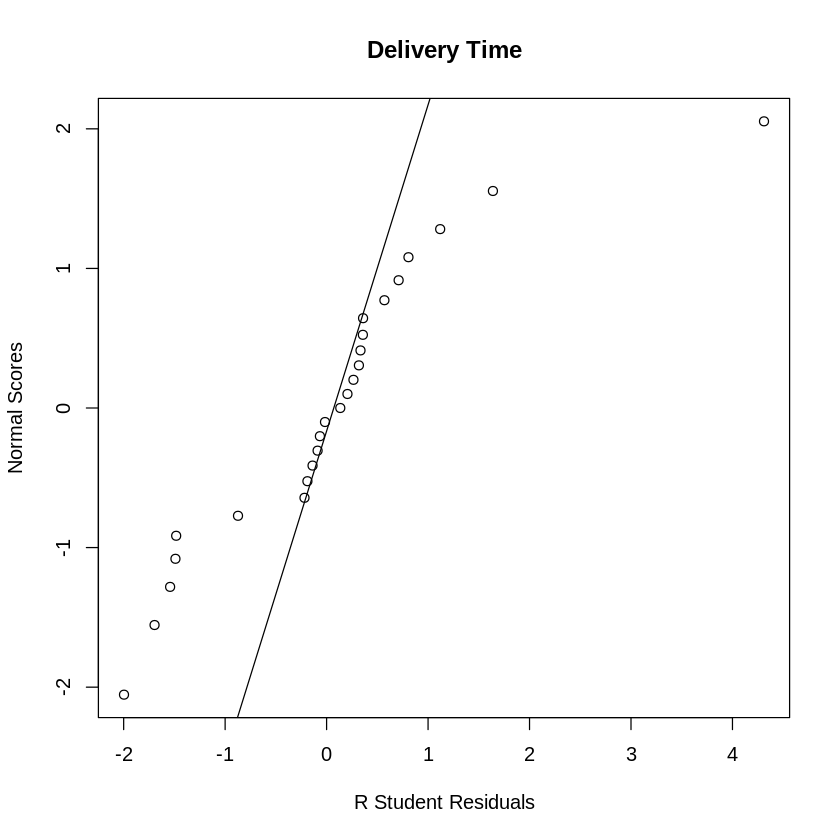

In [21]:
qqnorm(Delivery.RStudentResiduals,
       ylab="R Student Residuals",
       xlab="Normal Scores",
       main="Delivery Time"
       , datax=TRUE
)
qqline(Delivery.RStudentResiduals, distribution=qnorm, datax=TRUE)

## 4.3 - The Delivery Time Data

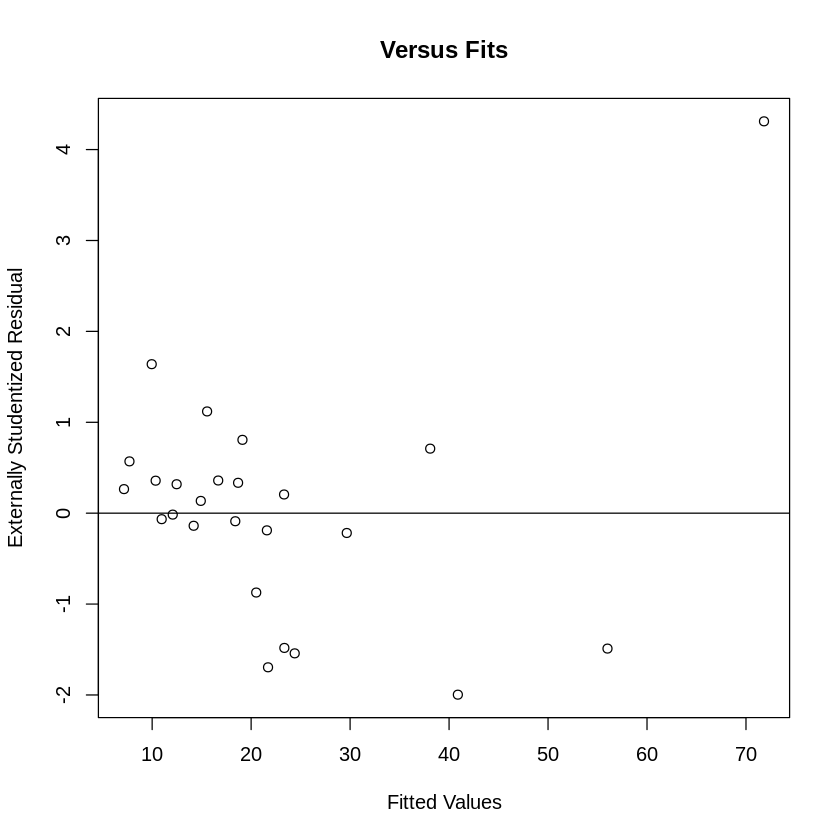

In [22]:
plot(
    fitted(Delivery.lm), 
    Delivery.Residual_df$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

## 4.4 - The Delivery Time Data

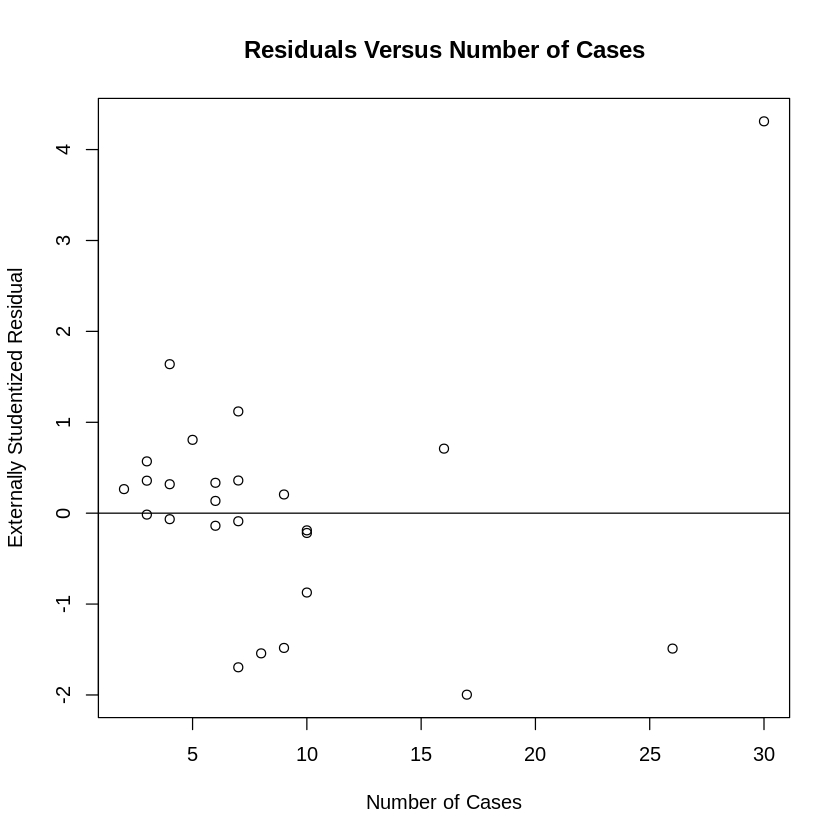

In [23]:
plot(
    Delivery.df$NumberCases, 
    Delivery.Residual_df$RStudentResiduals,
    xlab="Number of Cases",
    ylab="Externally Studentized Residual",
    main="Residuals Versus Number of Cases"
)
abline(h=0)

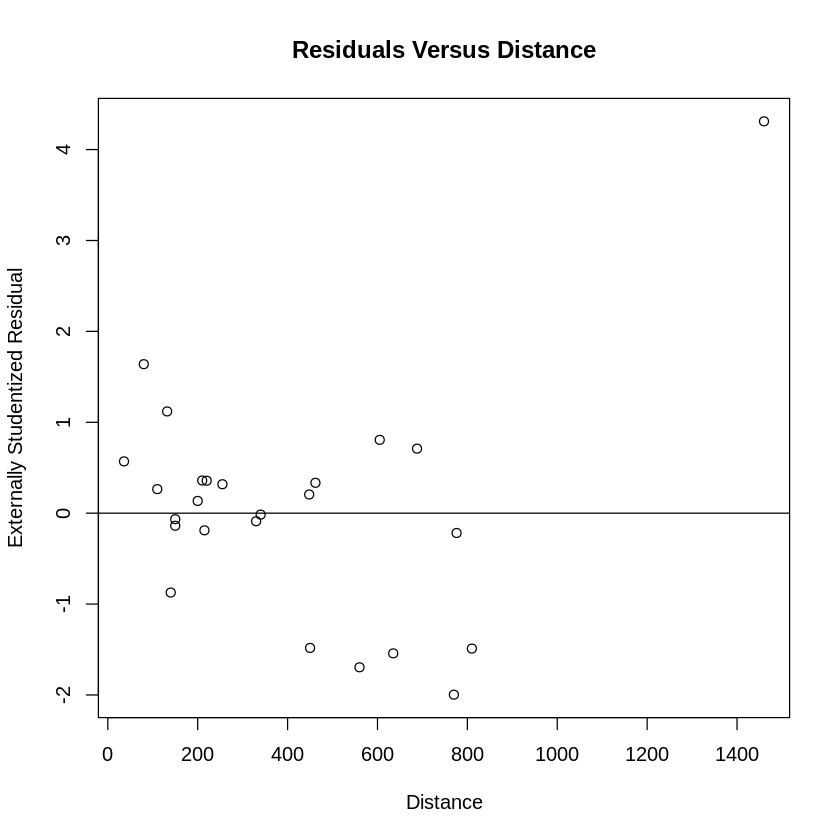

In [24]:
plot(
    Delivery.df$Distance, 
    Delivery.Residual_df$RStudentResiduals,
    xlab="Distance",
    ylab="Externally Studentized Residual",
    main="Residuals Versus Distance"
)
abline(h=0)

## 4.5 - The Delivery Time Data

In [25]:
CasesPartialRegressionA.lm <- lm(Delivery.df$DeliveryTime ~ Delivery.df$Distance)
CasesPartialRegressionA.Residuals <- resid(CasesPartialRegressionA.lm)
CasesPartialRegressionB.lm <- lm(Delivery.df$NumberCases ~ Delivery.df$Distance)
CasesPartialRegressionB.Residuals <- resid(CasesPartialRegressionB.lm)

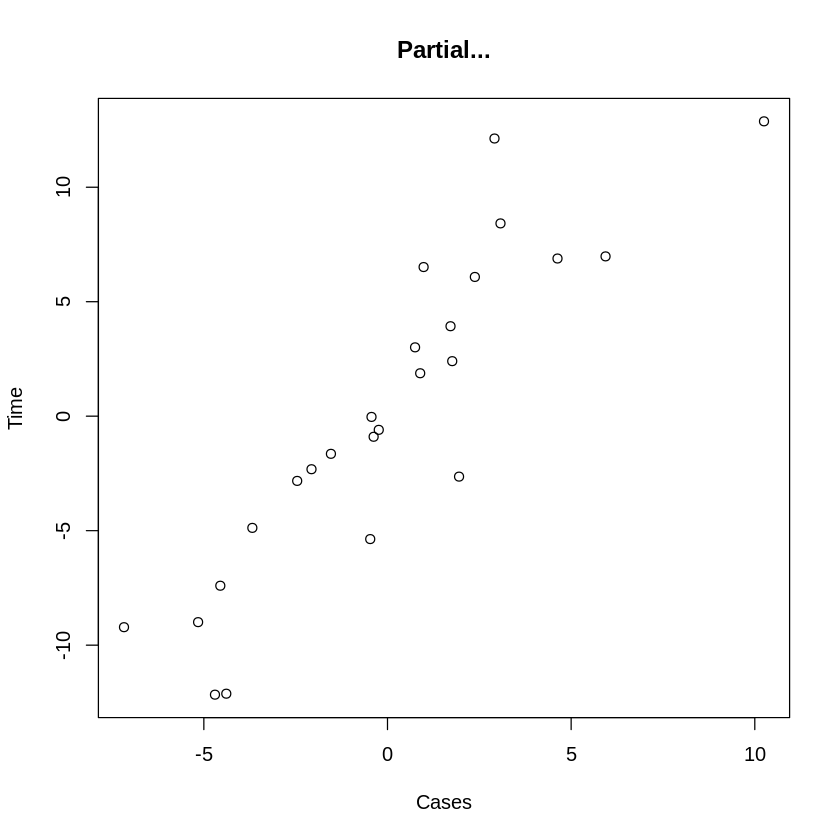

In [26]:
plot(
    CasesPartialRegressionB.Residuals, 
    CasesPartialRegressionA.Residuals,
    xlab="Cases",
    ylab="Time",
    main="Partial..."
)

In [27]:
DistancePartialRegressionA.lm <- lm(Delivery.df$DeliveryTime ~ Delivery.df$NumberCases)
DistancePartialRegressionA.Residuals <- resid(DistancePartialRegressionA.lm)
DistancePartialRegressionB.lm <- lm(Delivery.df$Distance ~ Delivery.df$NumberCases)
DistancePartialRegressionB.Residuals <- resid(DistancePartialRegressionB.lm)

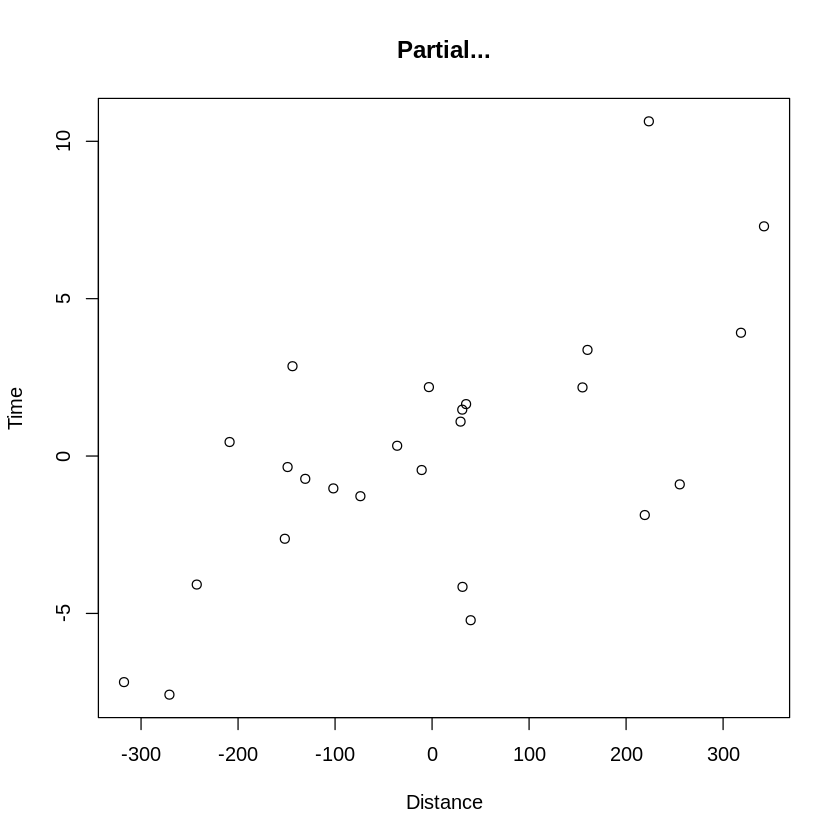

In [28]:
plot(
    DistancePartialRegressionB.Residuals, 
    DistancePartialRegressionA.Residuals,
    xlab="Distance",
    ylab="Time",
    main="Partial..."
)

## 4.6 - The Delivery Time Data

In [29]:
Delivery.Residual_df

,Residuals,StandardizedResiduals,StudentizedResiduals,HatMatrixDiagonals,PRESSResiduals,RStudentResiduals,PRESSResidualsSqrd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-5.0280843,-1.54260631,-1.62767993,0.10180178,-5.59796734,-1.69562881,3.133724e+01
2,1.1463854,0.35170879,0.36484267,0.07070164,1.23360321,0.35753764,1.521777e+00
3,-0.0497937,-0.01527661,-0.01609165,0.09873476,-0.05524867,-0.01572177,3.052415e-03
4,4.9243539,1.51078203,1.57972040,0.08537479,5.38401290,1.63916491,2.898759e+01
5,-0.4443983,-0.13634053,-0.14176094,0.07501050,-0.48043610,-0.13856493,2.308188e-01
6,-0.2895743,-0.08884082,-0.09080847,0.04286693,-0.30254339,-0.08873728,9.153250e-02
7,0.8446235,0.25912883,0.27042496,0.08179867,0.91986749,0.26464769,8.461562e-01
8,1.1566049,0.35484408,0.36672118,0.06372559,1.23532680,0.35938983,1.526032e+00
9,7.4197062,2.27635117,3.21376278,0.49829216,14.78889824,4.31078012,2.187115e+02


In [30]:
SS_Total <- sum(anova(Delivery.lm)[[2]])
R2_predictions <- 1 - (Delivery.PRESSResidualsStat / SS_Total)

In [31]:
R2_predictions

[1] 0.9206438

## 4.7 - Rocket Propellant Data

### Include all the data

In [57]:
Rocket.table <- read_excel(
    '../linear_regression_5e_data_sets/Chapter 2/Examples/data-ex-2-1 (Rocket Prop).xls')

Rocket.df <- data.frame(Rocket.table$`Shear Strength, yi (psi)`, 
                              Rocket.table$`Age of Propellant, xi (weeks)`)

colnames(Rocket.df) <- c("Shear", "Age")

Rocket.lm <- lm(
    Shear ~ Age, 
    data=Rocket.df) 

Rocket.anova <- anova(Rocket.lm)

Rocket.Residual_df <- data.frame(
    rstudent(Rocket.lm)
)

colnames(Rocket.Residual_df) <- c(
    "RStudentResiduals"
)

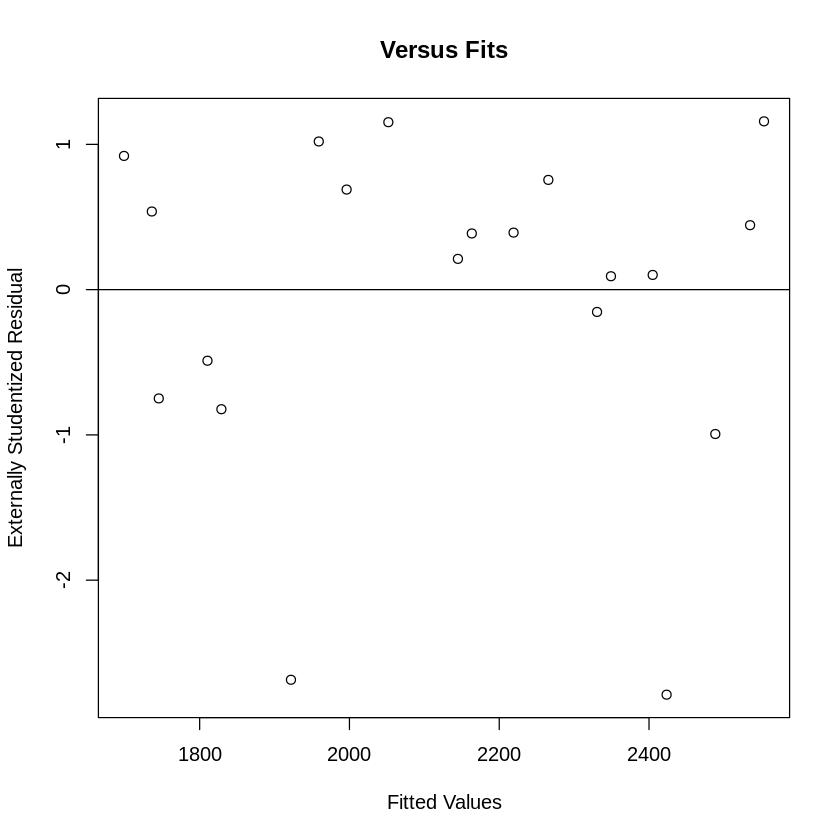

In [45]:
plot(
    fitted(Rocket.lm), 
    Rocket.Residual_df$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

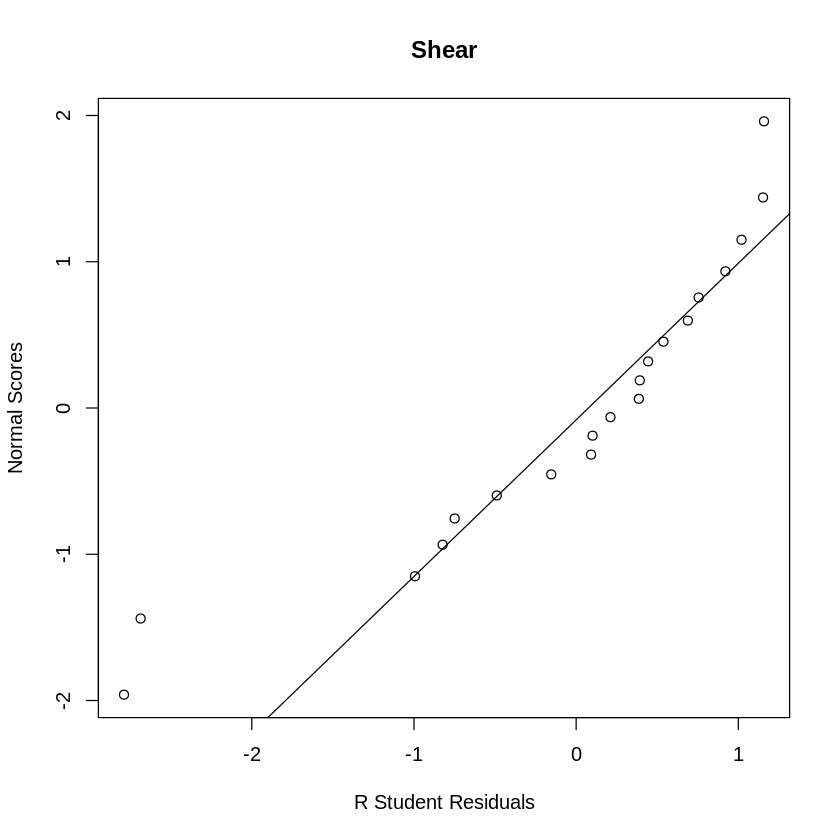

In [48]:
qqnorm(Rocket.Residual_df$RStudentResiduals,
       ylab="R Student Residuals",
       xlab="Normal Scores",
       main="Shear"
       , datax=TRUE
)
qqline(Rocket.Residual_df$RStudentResiduals, distribution=qnorm, datax=TRUE)

### Remove points 5 and 6

In [58]:
Rocket_2.df <- Rocket.df[-c(5, 6), ]

Rocket_2.lm <- lm(
    Shear ~ Age, 
    data=Rocket_2.df) 

Rocket_2.anova <- anova(Rocket_2.lm)

Rocket_2.Residual_df <- data.frame(
    rstudent(Rocket_2.lm)
)

colnames(Rocket_2.Residual_df) <- c(
    "RStudentResiduals"
)

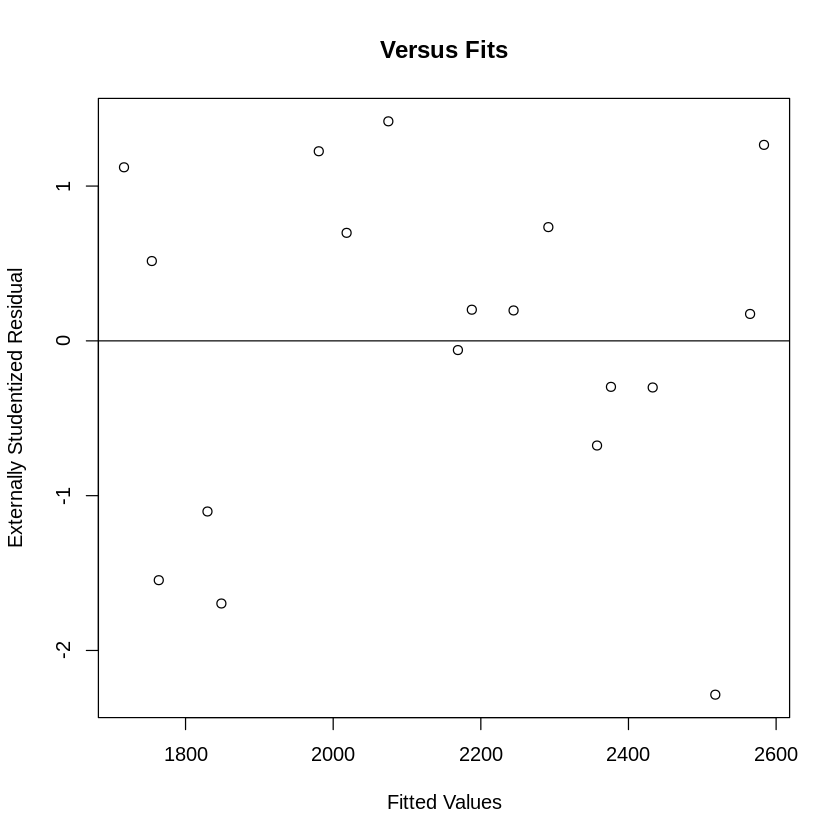

In [60]:
plot(
    fitted(Rocket_2.lm), 
    Rocket_2.Residual_df$RStudentResiduals,
    xlab="Fitted Values",
    ylab="Externally Studentized Residual",
    main="Versus Fits"
)
abline(h=0)

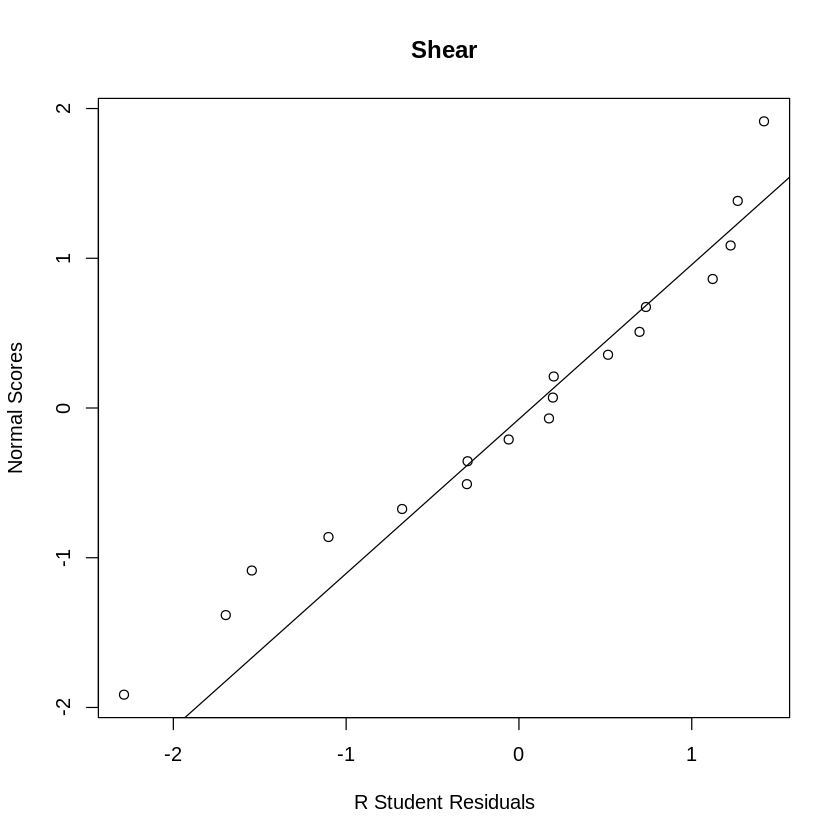

In [61]:
qqnorm(Rocket_2.Residual_df$RStudentResiduals,
       ylab="R Student Residuals",
       xlab="Normal Scores",
       main="Shear"
       , datax=TRUE
)
qqline(Rocket_2.Residual_df$RStudentResiduals, distribution=qnorm, datax=TRUE)

### Summary information for all data

In [65]:
Rocket.lm_summary <- summary(Rocket.lm)

In [70]:
coef(Rocket.lm_summary)[[1]]

[1] 2627.822

In [72]:
coef(Rocket.lm_summary)[[2]]

[1] -37.15359

In [76]:
Rocket.lm_summary$r.squared

[1] 0.9018414

In [80]:
Rocket.anova[[3]][2]

[1] 9236.381

In [84]:
coef(Rocket.lm_summary)[[4]]

[1] 2.889107

### Summary information for the Data Set removing points 5, 6

In [85]:
Rocket_2.lm_summary <- summary(Rocket_2.lm)

In [86]:
coef(Rocket_2.lm_summary)[[1]]

[1] 2658.973

In [87]:
coef(Rocket_2.lm_summary)[[2]]

[1] -37.69377

In [88]:
Rocket_2.lm_summary$r.squared

[1] 0.9577747

In [89]:
Rocket_2.anova[[3]][2]

[1] 3964.629

In [90]:
coef(Rocket_2.lm_summary)[[4]]

[1] 1.978629

## 4.8 - Testing for Lack of Fit

In [98]:
LoF.x <- c(1.0, 1.0, 2.0, 3.3, 3.3, 4.0, 4.0, 4.0, 4.7, 5.0, 5.6, 5.6, 
          5.6, 6.0, 6.0, 6.5, 6.9)
LoF.y <- c(10.84, 9.30, 16.35, 22.88, 24.35, 24.56, 25.86, 29.16, 24.59, 
          22.25, 25.90, 27.20, 25.61, 25.45, 26.56, 21.03, 21.46)
LoF.df <- data.frame(LoF.x, LoF.y)
colnames(LoF.df) <- c ("x","y")

In [100]:
LoF.lm <- lm(y ~ x, data=LoF.df)

In [101]:
summary(LoF.lm)


Call:
lm(formula = y ~ x, data = LoF.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4536 -1.6158  0.5638  2.6358  7.4246 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.2139     2.6649   4.959 0.000172 ***
x             2.1304     0.5645   3.774 0.001839 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.084 on 15 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4528 
F-statistic: 14.24 on 1 and 15 DF,  p-value: 0.001839


In [102]:
anova(LoF.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,237.4788,237.47877,14.2411,0.001839409
Residuals,15,250.1338,16.67559,NA,NA


In [105]:
# Sum of Squares Total
sum(anova(LoF.lm)[[2]])

[1] 487.6126

#### Pure Error Sum of Squares

In [129]:
SS_pe <- sum((LoF.df[LoF.df$x == 1.0,]$y - mean(LoF.df[LoF.df$x == 1.0,]$y))^2) +
sum((LoF.df[LoF.df$x == 3.3,]$y - mean(LoF.df[LoF.df$x == 3.3,]$y))^2) + 
sum((LoF.df[LoF.df$x == 4.0,]$y - mean(LoF.df[LoF.df$x == 4.0,]$y))^2) +
sum((LoF.df[LoF.df$x == 5.6,]$y - mean(LoF.df[LoF.df$x == 5.6,]$y))^2) + 
sum((LoF.df[LoF.df$x == 6.0,]$y - mean(LoF.df[LoF.df$x == 6.0,]$y))^2)

In [130]:
SS_res <- anova(LoF.lm)[[2]][2]

In [133]:
SS_lof <- SS_res - SS_pe
print(SS_lof)

[1] 234.5708


In [140]:
MS_lof <- SS_lof / (10 - 2)
MS_pe <- SS_pe / (17 - 10)
print(MS_lof)
print(MS_pe)

[1] 29.32135
[1] 2.22329


In [141]:
F_0 <- MS_lof / MS_pe
print(F_0)

[1] 13.18827


## 4.9 Testing for lack of fit 

In [176]:
LoF.lm <- lm(y ~ x, data=LoF.df)
LoF.lm_2 <- lm(y ~ factor(x), data=LoF.df)

In [180]:
anova(LoF.lm, LoF.lm_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15,250.13383,NA,NA,NA,NA
2,7,15.56303,8,234.5708,13.18827,0.001388715


## 4.10

In [184]:
4.9244-0.8446

[1] 4.0798